<a href="https://colab.research.google.com/github/wilsonfffs/CODING-DOJO/blob/main/Regresi%C3%B3n_lineal_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo /Codigo /week5/modifiedBostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
# obteniendo las columnas solicitadas en la tarea
df = df.loc[:, ['RM', 'LSTAT','PTRATIO', 'price']]
df.head()


,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [8]:
# Mira la forma del marco de datos
df.shape


(506, 4)

In [9]:
# Faltan valores en la columna y, que es lo que predeciremos.
df.isnull().sum()


RM         0
LSTAT      0
PTRATIO    0
price      1
dtype: int64

In [10]:
# Elimine filas enteras del marco de datos si contienen nans o 'todos'
# this may not be the best strategy for our dataset
df = df.dropna(how = 'any')


In [11]:
# No hay más valores perdidos
df.isnull().sum()


RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

In [12]:
df.shape

(505, 4)

In [13]:
df.corr()


,RM,LSTAT,PTRATIO,price
RM,1.000000,-0.614889,-0.356013,0.143347
LSTAT,-0.614889,1.000000,0.372996,-0.027292
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
price,0.143347,-0.027292,-0.187262,1.000000


In [14]:
df.corr().sort_values(by = ['price'])


,RM,LSTAT,PTRATIO,price
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
LSTAT,-0.614889,1.000000,0.372996,-0.027292
RM,1.000000,-0.614889,-0.356013,0.143347
price,0.143347,-0.027292,-0.187262,1.000000


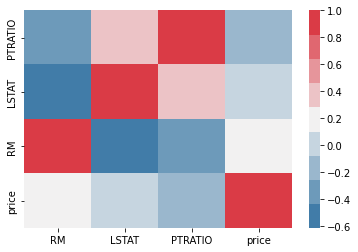

In [15]:
# Puede utilizar un mapa de calor para facilitar (en teoría) la lectura de la matriz de correlación
sns.heatmap(df.corr().sort_values(by = ['price']), cmap = sns.diverging_palette(240, 10, n=9))


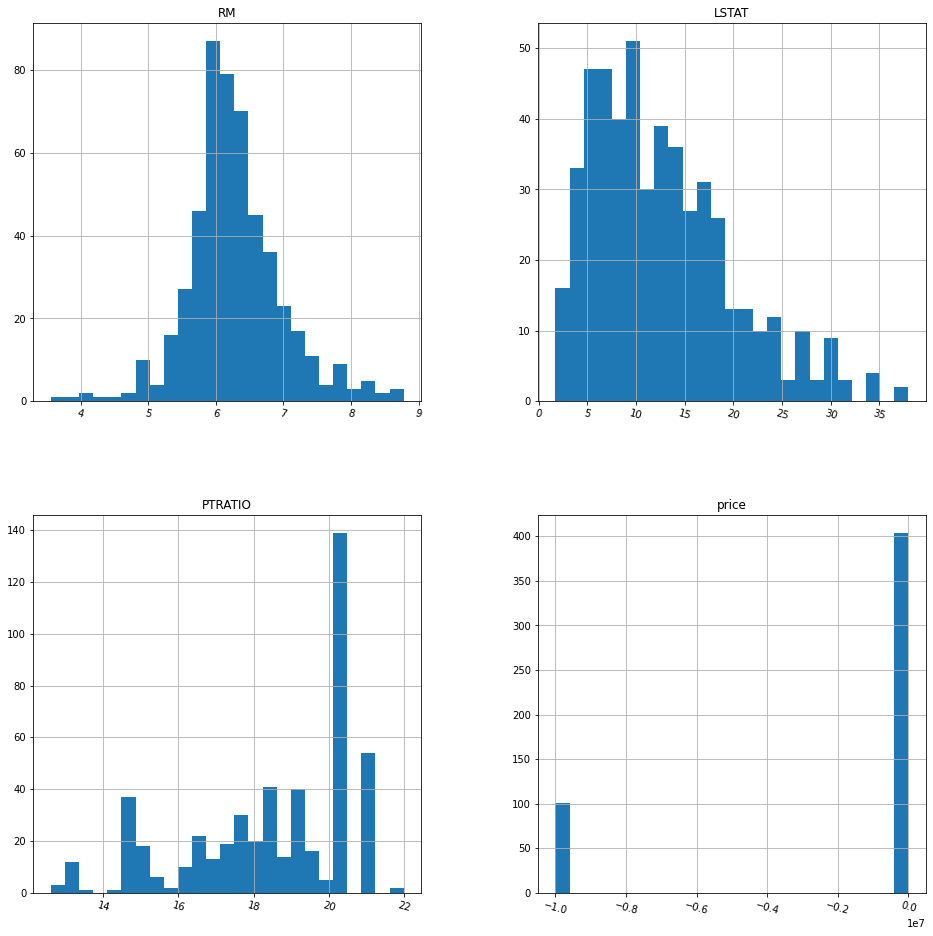

In [16]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);


In [29]:
priceFilter = df.loc[:, 'price'] < 0 
df = df.loc[~priceFilter, :]

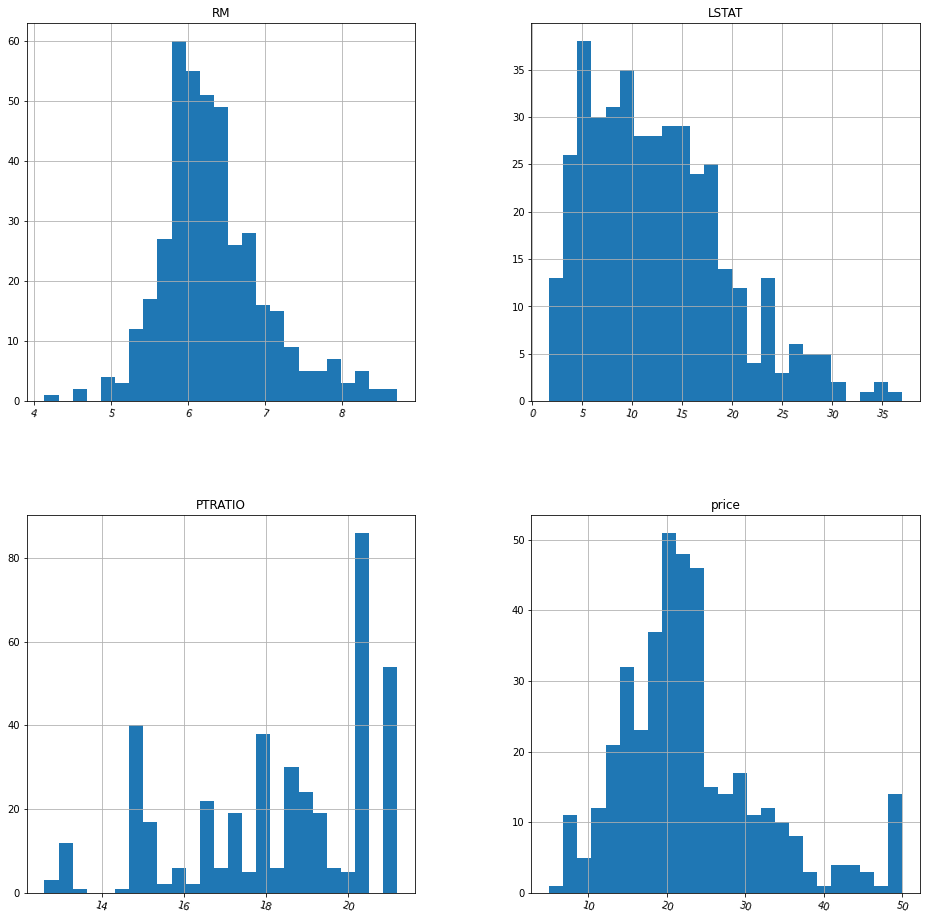

In [30]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);


In [31]:
df.corr()

,RM,LSTAT,PTRATIO,price
RM,1.000000,-0.650967,-0.349077,0.798988
LSTAT,-0.650967,1.000000,0.384370,-0.752900
PTRATIO,-0.349077,0.384370,1.000000,-0.551638
price,0.798988,-0.752900,-0.551638,1.000000


In [32]:
df.corr().sort_values(by = ['price'])

,RM,LSTAT,PTRATIO,price
LSTAT,-0.650967,1.000000,0.384370,-0.752900
PTRATIO,-0.349077,0.384370,1.000000,-0.551638
RM,1.000000,-0.650967,-0.349077,0.798988
price,0.798988,-0.752900,-0.551638,1.000000


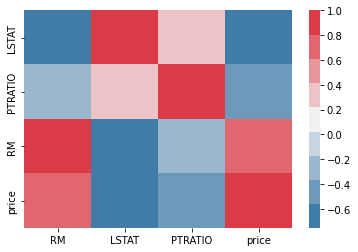

In [33]:
# Puede utilizar un mapa de calor para facilitar (en teoría) la lectura de la matriz de correlación
sns.heatmap(df.corr().sort_values(by = ['price']), cmap = sns.diverging_palette(240, 10, n=9))

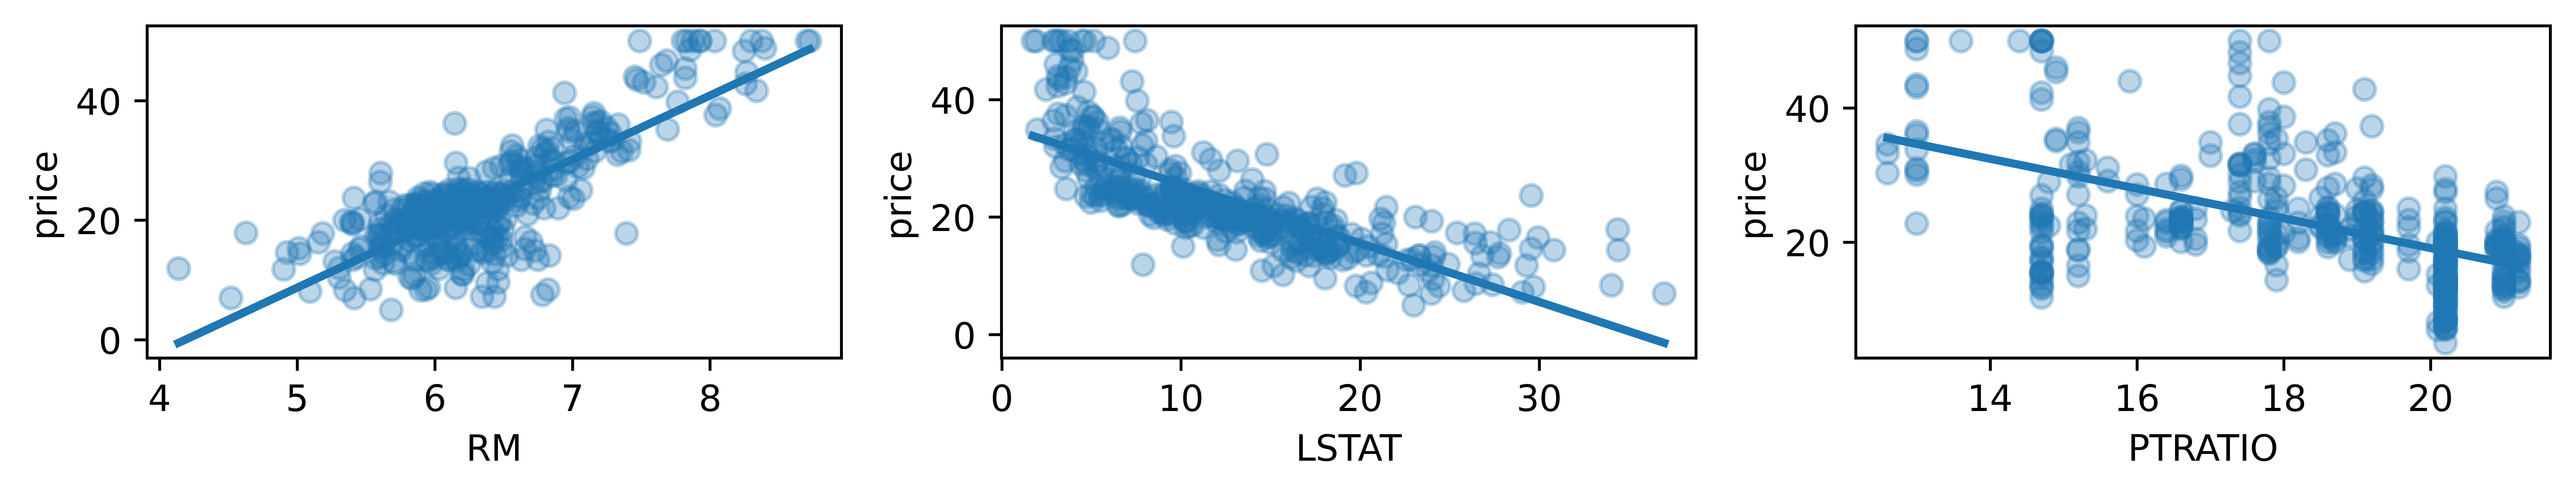

In [34]:
"""
You can use seaborn to see if you have linear relationships between each feature variable and the target
"""
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='RM', y='price', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()


In [35]:
# matriz de características (debe ser una matriz NumPy)
# valores convierte el marco de datos en Num
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values
X

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [36]:
# Features Matrix needs to be at 2 dimensional
X.shape


(404, 3)

In [37]:
# vector de destino
y = df.loc[:, 'price'].values


In [24]:
y.shape


(505,)

In [38]:
# Hacer una instancia de regresión lineal
reg = LinearRegression(fit_intercept=True)


In [39]:
reg.fit(X,y)


LinearRegression()

In [47]:
# La entrada debe ser bidimensional (la remodelación hace que la entrada sea bidimensional)
reg.predict(X[0].reshape(-1,3))

array([30.93692265])

In [67]:
y_pred = reg.predict(X[0:405])
y_pred


array([ 3.09369226e+01,  2.55473291e+01,  3.28784091e+01,  3.12212690e+01,
        3.11415852e+01,  2.64524545e+01,  2.39930718e+01,  2.20562208e+01,
        1.36730012e+01,  2.18586870e+01,  2.28327751e+01,  2.35988313e+01,
        2.17175541e+01,  1.95959933e+01,  1.96769076e+01,  1.87417234e+01,
        2.02521837e+01,  1.70101839e+01,  1.48062440e+01,  1.67815222e+01,
        1.14018200e+01,  1.72192176e+01,  1.62104640e+01,  1.35172603e+01,
        1.58471168e+01,  1.36037962e+01,  1.57770131e+01,  1.62239072e+01,
        2.11839990e+01,  2.27334821e+01,  1.16434747e+01,  1.82790834e+01,
        1.09335364e+01,  1.34583705e+01,  1.51841446e+01,  2.06693479e+01,
        1.92897321e+01,  2.05259388e+01,  2.06870576e+01,  2.83432219e+01,
        3.22238170e+01,  2.96716827e+01,  2.52640125e+01,  2.48153144e+01,
        2.29356021e+01,  2.00816111e+01,  1.90134221e+01,  1.85548124e+01,
        9.02806127e+00,  1.68826423e+01,  2.16035830e+01,  2.44007478e+01,
        2.88697996e+01,  

In [68]:
score = reg.score(X, y)
print(score)


0.7848414273030438


In [69]:
reg.coef_


array([ 6.61452725, -0.44571061, -1.00672009])

In [70]:
reg.intercept_


5.0688621830514755

In [71]:
m1 = reg.coef_[0]
m2 = reg.coef_[1]
m3 = reg.coef_[2]
b = reg.intercept_
# siguiendo la forma de intersección de pendiente
print("formula: y = {:.2f}*RM + {:.2f}*LSTAT + {:.2f}*'PTRATIO + {:.2f}".format(m1,m2,m3,b) )


formula: y = 6.61*RM + -0.45*LSTAT + -1.01*'PTRATIO + 5.07


In [72]:
y.shape


(404,)

In [73]:
y_pred.shape

(404,)

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 3.2313558816689714
Mean Squared Error: 17.915487275260496
Root Mean Squared Error: 4.232669048633556
